# Questions:
#### 1-The most popular genre combination
#### 2-The highest year range in movies popularity
#### 3-The top director in gaining revenue
#### 4-Most popular genre combination in years: 1980,1990
#### 5-Which budget category is more popular agnd gaind more revenue
#### 6-The genre that has the most movies

#   

### Import libraries and load dataframe

In [1]:
import pandas as pd #importing pandas and giving it an alyas
import numpy as np #importing numpy and giving it an alyas
import matplotlib.pyplot as plt #importing matplotlib and giving it an alyas
import squarify as sq #importing squarify and giving it an alyas

pd.options.mode.chained_assignment = None  #prevents the "SettingWithCopyWarning"
df = pd.read_csv('tmdb-movies.csv') #load dataframe
df.head(2) #displaying first two rows of dataframe

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [2]:
df.info() #check if their is null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Dealing with null values

In [3]:
df['homepage'][df['homepage'].isna() == True] = 'No Homepage' #changing the null values in homepage columns to 'No Homepage' 
df.dropna(inplace=True) #dropping null values
df.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
Index: 7031 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7031 non-null   int64  
 1   imdb_id               7031 non-null   object 
 2   popularity            7031 non-null   float64
 3   budget                7031 non-null   int64  
 4   revenue               7031 non-null   int64  
 5   original_title        7031 non-null   object 
 6   cast                  7031 non-null   object 
 7   homepage              7031 non-null   object 
 8   director              7031 non-null   object 
 9   tagline               7031 non-null   object 
 10  keywords              7031 non-null   object 
 11  overview              7031 non-null   object 
 12  runtime               7031 non-null   int64  
 13  genres                7031 non-null   object 
 14  production_companies  7031 non-null   object 
 15  release_date          703

### Dealing with duplicates

In [4]:
sum(df['id'].duplicated()) #checking number od duplicates

1

In [16]:
df.drop_duplicates(inplace=True) #dropping duplicates

### Getting the 30 most popular genre combination

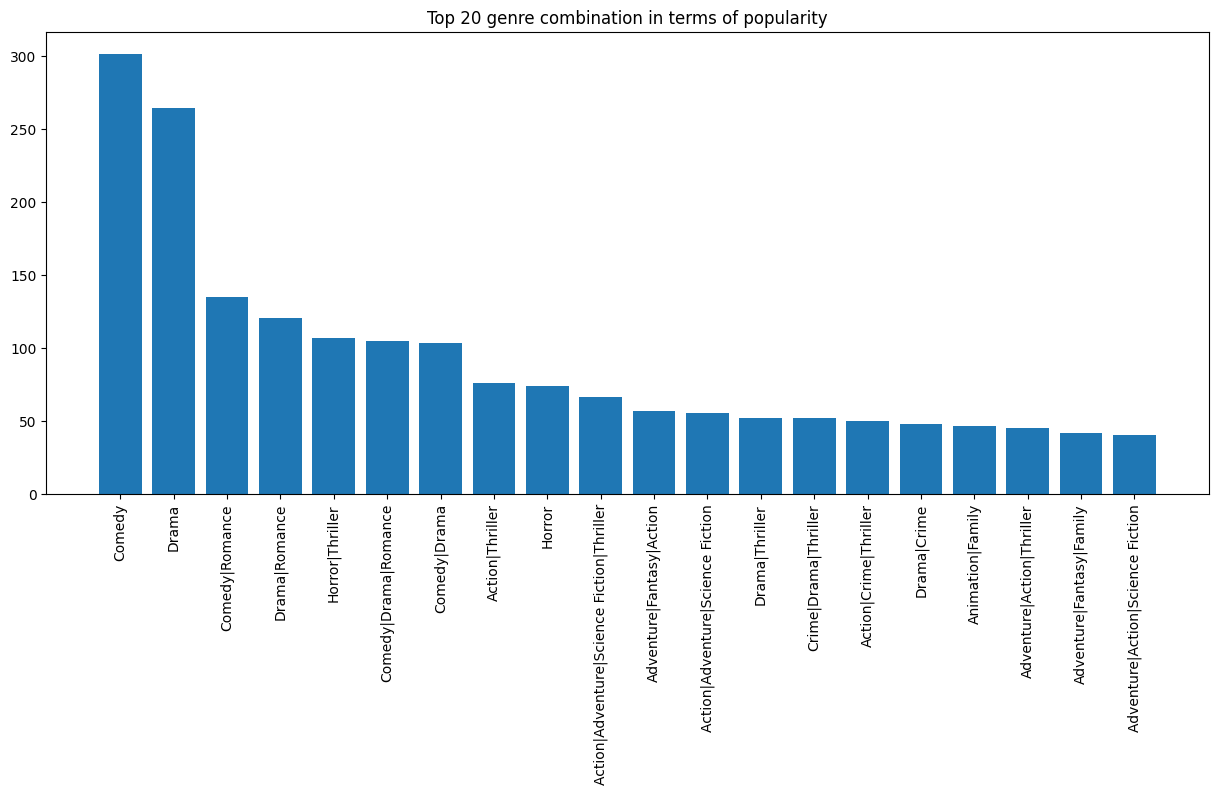

In [20]:
def genres_combination_popularity(): #defining the genres_combination_popularity function
    grp = pd.DataFrame(df.groupby('genres')['popularity'].sum()) #making a dataframe of the sum of popularity of each genre combination
    grp.sort_values(by='popularity',ascending=False, inplace=True) #sorting the genres descendingly by popularity
    grp.reset_index(inplace=True) #turning genres into a column
    plt.figure(figsize=(15,6)) #detrmining the size of the plot
    plt.xticks(rotation=90) #rotating plot labels
    plt.title('Top 20 genre combination in terms of popularity') #setting label title
    plt.bar(grp['genres'][:20],grp['popularity'][:20]) #making a bar plot of the top 20 genre combinations

genres_combination_popularity() #calling genre_combination_popularity function

### Checking increase and decrease in movies popularity each year

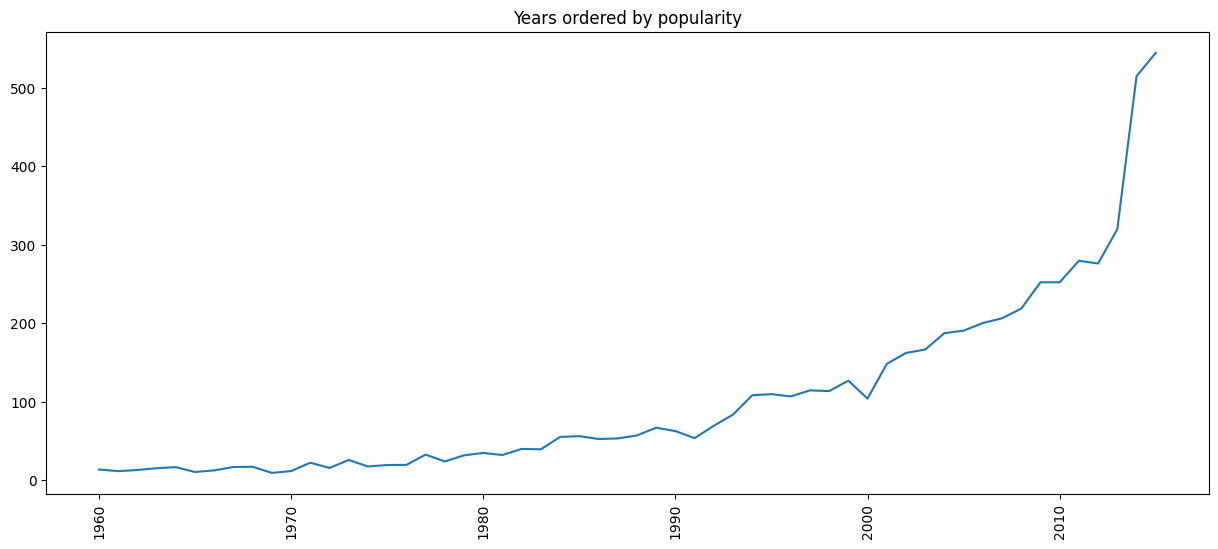

In [7]:
def year_popularity(): #defining the year_popularity function
    grp = pd.DataFrame(df.groupby('release_year')['popularity'].sum()) #making a dataframe of the sum of popularity of each year
    grp.reset_index(inplace=True) #turning release_year into a column
    plt.figure(figsize=(15,6)) #detrmining the size of the plot
    plt.xticks(rotation=90) #rotating plot labels
    plt.title('Years ordered by popularity') #setting label title
    plt.plot(grp['release_year'],grp['popularity']) #plotting release_year by popularity

year_popularity() #calling year_popularity function

##### Additional years could have made the data more accurate

### Checking the top 20 directors in gaining revenue

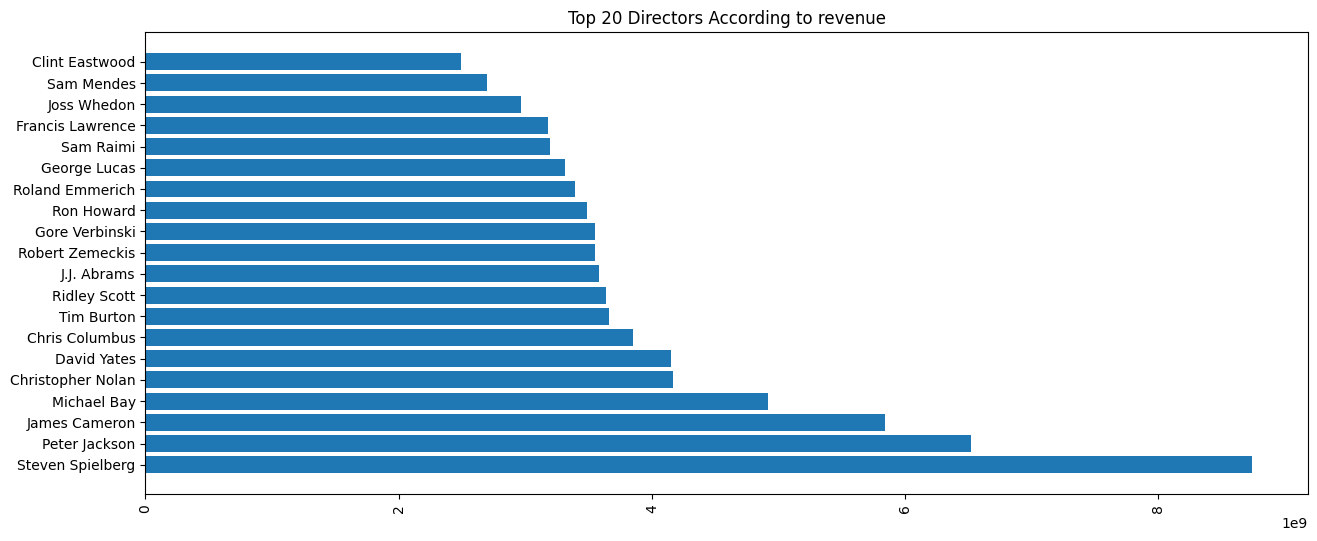

In [8]:
def top_directors(): #defining the top_directors function
    grp = pd.DataFrame(df.groupby('director')['revenue'].sum()) #making a dataframe of the sum of revenue of each directors
    grp.sort_values(by='revenue',ascending=False,inplace=True) #sorting the directors descendingly by popularity
    grp.reset_index(inplace=True) #turning directors into a column
    plt.figure(figsize=(15,6)) #detrmining the size of the plot
    plt.xticks(rotation= 90) #rotating plot labels
    plt.title('Top 20 Directors According to revenue') #setting label title
    plt.barh(grp['director'][:20],grp['revenue'][:20]) #making a horizontal bar plot of the top 20 directors

top_directors() #calling top_directors function

### Getting most popular genre combination in years: 1980,1990

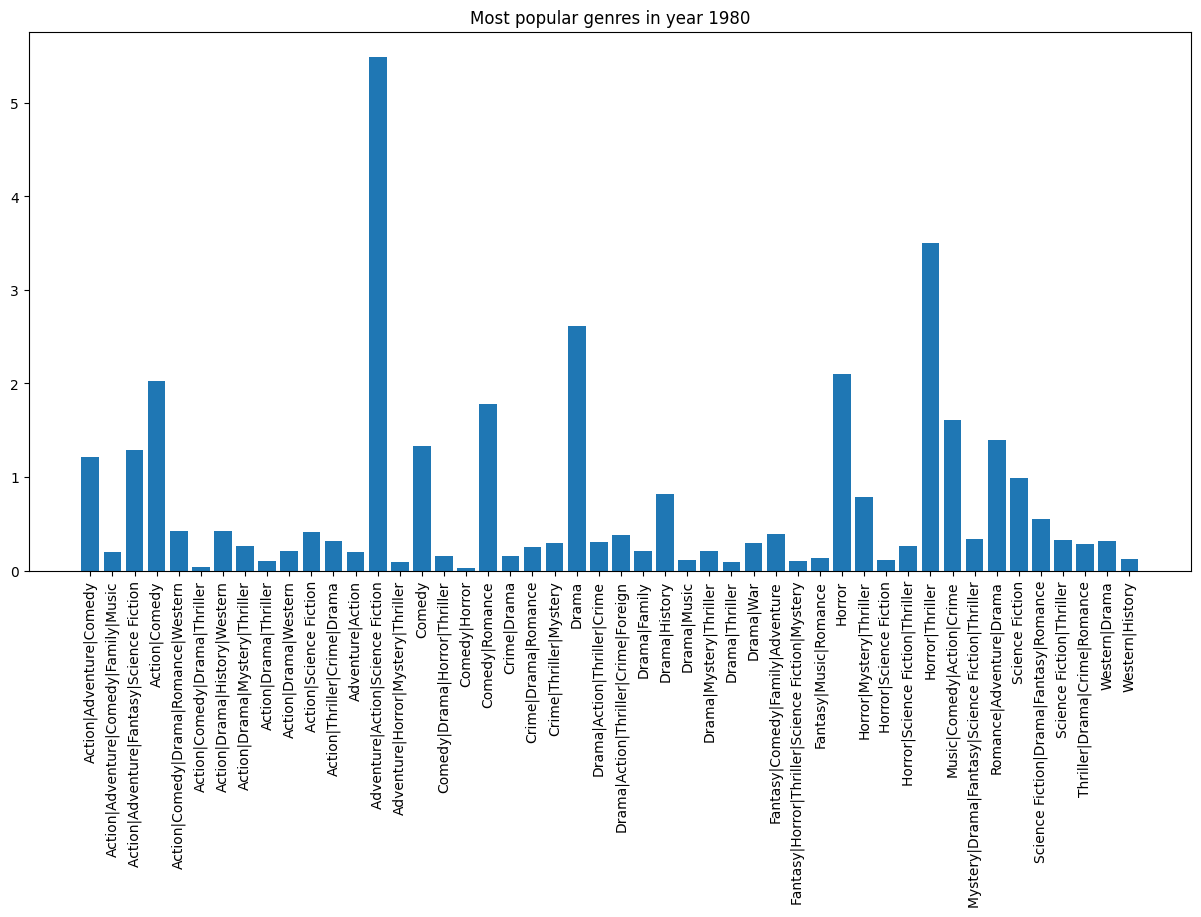

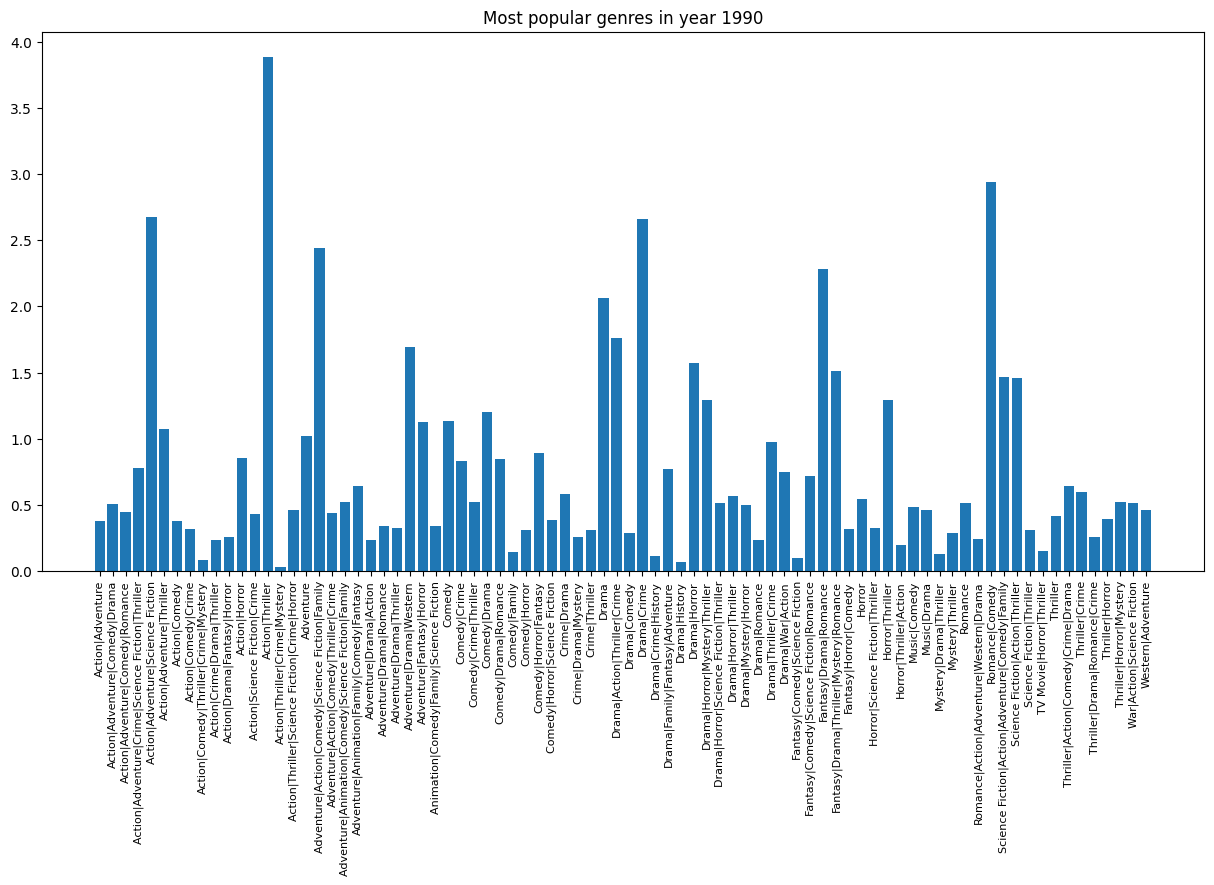

In [23]:
def get_year_popularity(year): #defining the get_year_popularity function
    grp = pd.DataFrame(df.groupby(['release_year','genres'])['popularity'].sum()) #making a dataframe of the sum of popularity of each genre combination in each year
    grp.reset_index(inplace=True) #turning genres and release_year into columns
    plt.figure(figsize=(15,7)) #detrmining the size of the plot
    plt.xticks(rotation = 90) #rotating plot labels
    plt.rc('xtick', labelsize=8) #setting the font size of the labels
    plt.title(f'Most popular genres in year {year}') #setting label title
    plt.bar(grp['genres'][grp['release_year'] == int(year)],grp['popularity'][grp['release_year'] == int(year)]) #making a bar plot of the genre combinations of years parameter
    

get_year_popularity(1980) #calling get_year_popularity function and passing 1980 as an index
get_year_popularity(1990) #calling get_year_popularity function and passing 1990 as an index


### Checking which budget category is more popular agnd gaind more revenue

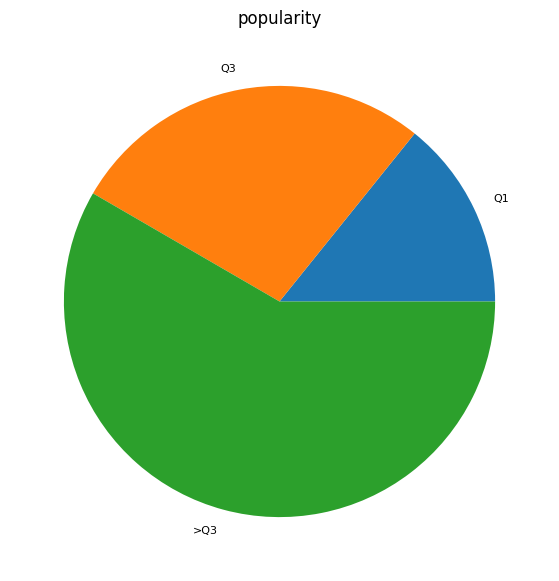

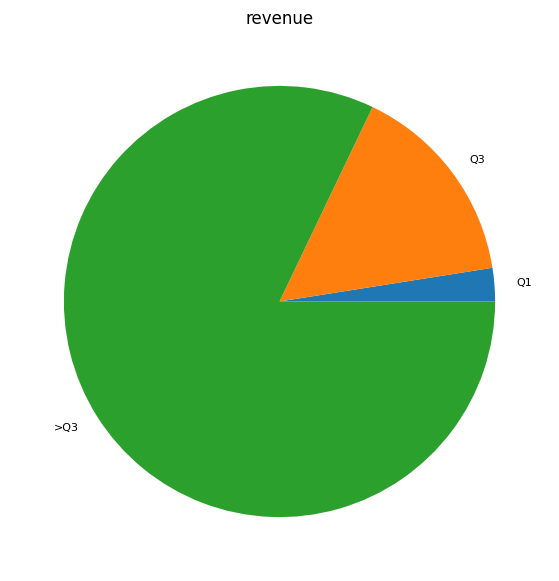

In [29]:
def relation_to_budget(column): #defining the relation_to_budget function
    Q1 = np.quantile(df['budget'],.25) #getting the first quantile of budget coulmn
    Q3 = np.quantile(df['budget'],.75) #getting the third quantile of budget coulmn

    under_Q1 = df[:][df['budget'] <= Q1] #getting all the movies with budget less than or equal Q1 and making it a dataframe
    under_Q3 = df[:][(df['budget'] <= Q3) & (df['budget'] > Q1)] #getting all the movies with budget less than or equal Q3 and more than Q1 and making it a dataframe
    more_Q3 = df[:][df['budget'] > Q3] #getting all the movies with budget more than or equal Q3 and making it a dataframe

    avg1 = under_Q1[column].mean() #getting the mean of column parameter of under_Q1 dataframe
    avg2 = under_Q3[column].mean() #getting the mean of column parameter of under_Q3 dataframe
    avg3 = more_Q3[column].mean() #getting the mean of column parameter of more_Q3 dataframe

    plt.figure(figsize=(14,7)) #detrmining the size of the plot
    plt.title(column) #setting label title
    plt.pie([avg1,avg2,avg3],labels=['Q1','Q3','>Q3']) #making a pie plot of the [column] of movies in each quantile of budget


relation_to_budget('popularity') #calling relation_to_budget function and passing popularity as an index
relation_to_budget('revenue') #calling relation_to_budget function and passing revenue as an index

### Number of movies per genre

In [40]:
keys = [] #making a list of the keys
values = [] #making a list of the values
for genre in df['genres']: #iterating over the genres column in df
    for i in genre.split('|'): #iterating over genre while splitted
        keys.append(i) #appending t to keys list

for i in keys: #iterating over keys list
    values.append(keys.count(i)) #appending the number of i in keys list to values list

num_genres = {keys[i]: values[i] for i in range(len(keys))} #making a dictionary with values of keys list as keys and values of values list as values

df_of_num_genres = pd.DataFrame.from_dict(num_genres, orient='index',columns=['count']) #making a dataframe of num_genres dictionary
sq.plot(sizes=df_of_num_genres['count'], label=df_of_num_genres.index, pad=0.2, norm_x = 300, norm_y = 250,
    text_kwargs={'fontsize':6}) #making a treemap of df_of_num_genres dataframe
plt.axis("off") #removing axis of treemap
plt.title('Number of movies per genre') #setting a title for the tree map
df_of_num_genres #displaying the df_of_num_genres dataframe


# Conclusion:
#### 1-Comedy was the most popular genre combination
#### 2-The years from 2010 to 2015 were the highest years in movies popularity
#### 3-The movies that gained the most revenue were directed by Steven Spielberg
#### 4-The most popular genre combination in 1980 was Adventure|Action|Science Fiction and in year 1990 was Action|thriller
#### 5-Movies that are higher than the 3rd quantile of budget are the highest in popularity and revenue
#### 6-Action is the genre with the most movies

# Limitation:
#### -Having the genres,cast and production_company as string not list made the analysis harder  